In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  

Exploratory data analysis

In [4]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1 = df.groupby(['Survived'])['PassengerId'].count().reset_index(name="count")
df1

,Survived,count
0,0,549
1,1,342


<AxesSubplot:xlabel='Survived', ylabel='count'>

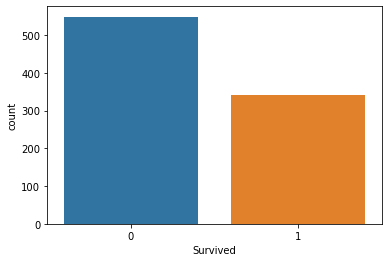

In [7]:
sns.barplot(x='Survived', y='count', data=df1)  

In [8]:
df2 = df.groupby(['Survived', 'Sex', 'Pclass'])['PassengerId'].count().reset_index(name="count")
df2

,Survived,Sex,Pclass,count
0,0,female,1,3
1,0,female,2,6
2,0,female,3,72
3,0,male,1,77
4,0,male,2,91
5,0,male,3,300
6,1,female,1,91
7,1,female,2,70
8,1,female,3,72
9,1,male,1,45


In [9]:
df3 = df.groupby(['Survived', 'Age'])['PassengerId'].count().reset_index(name="count")
df3

,Survived,Age,count
0,0,1.0,2
1,0,2.0,7
2,0,3.0,1
3,0,4.0,3
4,0,6.0,1
...,...,...,...
137,1,58.0,3
138,1,60.0,2
139,1,62.0,2
140,1,63.0,2


<AxesSubplot:xlabel='Age', ylabel='Count'>

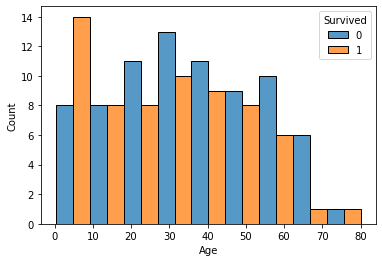

In [10]:
sns.histplot(x='Age', data=df3, hue='Survived', multiple='dodge')

In [11]:
df4 = df3.groupby('Survived').mean()['Age'].reset_index(name='Avg.Age')
df4

,Survived,Avg.Age
0,0,35.551948
1,1,29.216769


In [12]:
df_fill1 = df[df['Survived'] == 0].fillna(df4[df4['Survived'] == 0]['Avg.Age'])
df_fill1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [13]:
df_fill2 = df[df['Survived'] == 1].fillna(df4[df4['Survived'] == 1]['Avg.Age'])
df_fill2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
df_fill = pd.concat([df_fill1, df_fill2])
df_fill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
df_f = df2.groupby(['Survived', 'Sex', 'Pclass']).sum('count')
df_f

count
Survived Sex    Pclass       
0        female 1           3
                2           6
                3          72
         male   1          77
                2          91
                3         300
1        female 1          91
                2          70
                3          72
         male   1          45
                2          17
                3          47

<font size="5">Train a model</font>

Use scikit Learn to train a LogReg model


In [52]:
#Use train.csv data(after filling missing value(Age)) 
X = df_fill[['Pclass']] # note: Scikit learn only takes matrices (re training set)
y = df_fill['Survived']

In [53]:
X.shape, y.shape

((891, 1), (891,))

In [54]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [55]:
m = LogisticRegression() 
#instantiating the model; here, you also will be degining 
# the hyperparameters of your models
# example: the "class_weight" -param (only relevant for imbalanced datasets)

In [56]:
m.fit(X_train, y_train) 

LogisticRegression()

What happens "under the hood" when calling .fit()?

1. learning parameters from training set, predicting, calculating loss and updating model params => until the "best" parameters have been found ("gradient descent")
2. Careful: call m.fit() ONLY on training data (think of it like preparing for an exam, while not knowing what will be asked of you in the actual exam setup)
3. Caveat re 2.: => there is a difference between m.fit() and m.fit_transform()! You will learn about the difference when doing "feature engineering"...transforming belongs to feature engineering and you DO apply m.fit_transform to your test data as well ('cos u want to be able to compare one data set with the other - which can only be done if you "transform" both sets in the same manner)

In [57]:
m.coef_, m.intercept_

(array([[-0.80815148]]), array([1.34902499]))

What does the sigmoid function look like in this case?

Text(0.5, 0, 'Pclass')

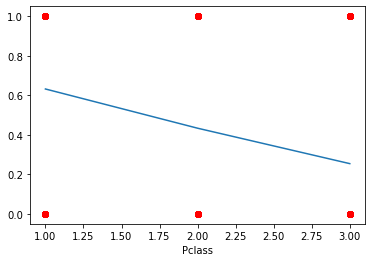

In [58]:
survived = df['Survived'] == 1
plt.plot(df['Pclass'], survived, 'ro') 

a =  -0.80815148 
b = 1.34902499

X = np.linspace(1, 3, 3)
y = 1 / (1 + np.exp(-(a * X + b)))
# # a steepness of the threshold, b position of the threshold
plt.plot(X, y)
plt.xlabel('Pclass')

<font size="5">Evaluate model</font>

In [59]:
m.score(X_train, y_train)

0.6736526946107785

In [60]:
m.score(X_test, y_test) 

0.695067264573991

<font size="5">Predict</font>

In [96]:
# predict classes (also referred to as"hard predictions")
y_pred = m.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0])

In [121]:
# predict probabilities of being in a specific class ("soft predictions")
prob_score = m.predict_proba(X_test)
prob_score

#why 2d in the first place?

array([[0.56642453, 0.43357547],
       [0.3679844 , 0.6320156 ],
       [0.74562807, 0.25437193],
       [0.3679844 , 0.6320156 ],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.56642453, 0.43357547],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.56642453, 0.43357547],
       [0.56642453, 0.43357547],
       [0.56642453, 0.43357547],
       [0.74562807, 0.25437193],
       [0.56642453, 0.43357547],
       [0.74562807, 0.25437193],
       [0.56642453, 0.43357547],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.74562807, 0.25437193],
       [0.

<font size="5">Confusion matrix</font>

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)


array([[122,  52],
       [ 16,  33]])

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.695067264573991

<font size="5">Presision</font>

In [105]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.673469387755102

<font size="5">Recall/True positive rate</font>

In [106]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.38823529411764707

<font size="5">F1 score</font>

In [107]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.4925373134328358

<font size="5">AUC, ROC and Precision-Recall Curves</font>



In [137]:
# calculate roc curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_score[:,1], pos_label=1)


#prob_score is list?

In [145]:
from sklearn.metrics import plot_roc_curve

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
metrics.plot_roc_curve(x_test, prob_score[:,1])
plt.show()



TypeError: plot_roc_curve() missing 1 required positional argument: 'y'